## Mount to Google Drive

## Install Necessary Modules

In [ ]:
%pip install mne
%pip install pyEDFlib

## Import Necessary Modules

In [ ]:
%pip install torch

In [7]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import torch
from torch import nn
import torch.nn.functional as F
from mne.time_frequency import psd_array_multitaper
import matplotlib.colors as mcolors

## Load the Data

In [24]:
zip_path = 'EEG-Data.zip'

In [25]:
def unzip_file(zip_path, extract_to):
    # Ensure the extraction path exists
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as ref:
        # Extract all the contents to the specified directory
        ref.extractall(extract_to)
        print(f"Extracted all contents from {zip_path} to {extract_to}")

In [26]:
unzip_file(zip_path,'Data' )

Extracted all contents from EEG-Data.zip to Data


In [ ]:
# load all edf files from data folder to a list using mne.io.read_raw_edf

edf_files = [os.path.join('Data', filename) for filename in os.listdir('Data') if filename.endswith('.edf')]
sorted_edf_files = sorted(edf_files)
raw_data_list = [mne.io.read_raw_edf(edf_file) for edf_file in sorted_edf_files]

In [28]:
print(raw_data_list)
print(len(raw_data_list))

[<RawEDF | Subject00_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_1.edf, 21 x 85000 (170.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_2.edf, 21 x 31000 (62.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_1.edf, 21 x 91000 (182.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_2.edf, 21 

In [29]:
concatenated_raw_data_list = []
for i in range(len(raw_data_list)//2):
  concatenated_data = mne.concatenate_raws([raw_data_list[i*2], raw_data_list[i*2+1]])
  concatenated_raw_data_list.append(concatenated_data)

In [30]:
print(concatenated_raw_data_list)

[<RawEDF | Subject00_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject01_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject02_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject03_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject04_1.edf, 21 x 116000 (232.0 s), ~26 kB, data not loaded>, <RawEDF | Subject05_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject06_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject07_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject08_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject09_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject10_1.edf, 21 x 125000 (250.0 s), ~26 kB, data not loaded>, <RawEDF | Subject11_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | Subject12_1.edf, 21 x 122000 (244.0 s), ~26 kB, data not loaded>, <RawEDF | S

## Analysing Power Spectral Density

In [31]:
data0_before = raw_data_list[0].load_data()
data0_after = raw_data_list[1].load_data()

Reading 0 ... 121999  =      0.000 ...   243.998 secs...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


### Different Frequencies

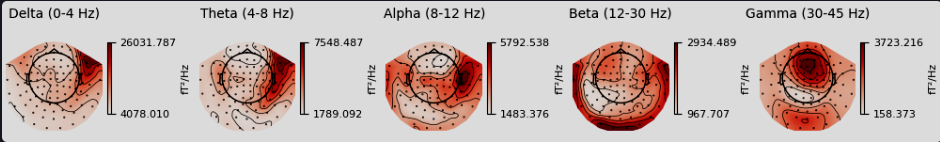

### Plots

#### Delta - (0 Hz - 4 Hz)

##### Before Arithmetic Monitoring

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


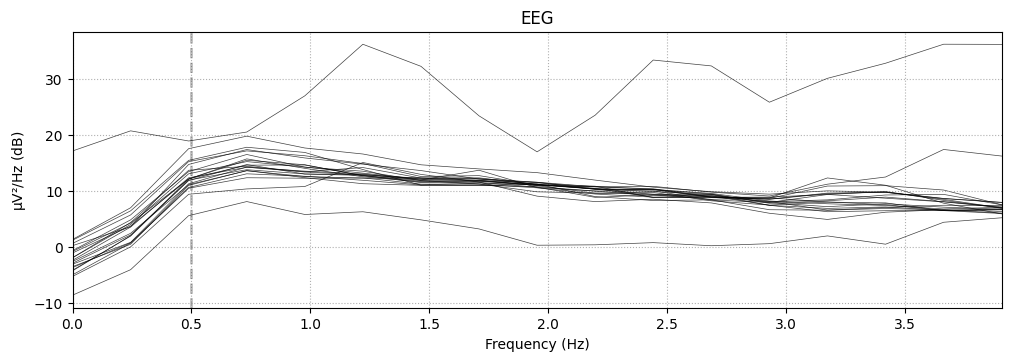

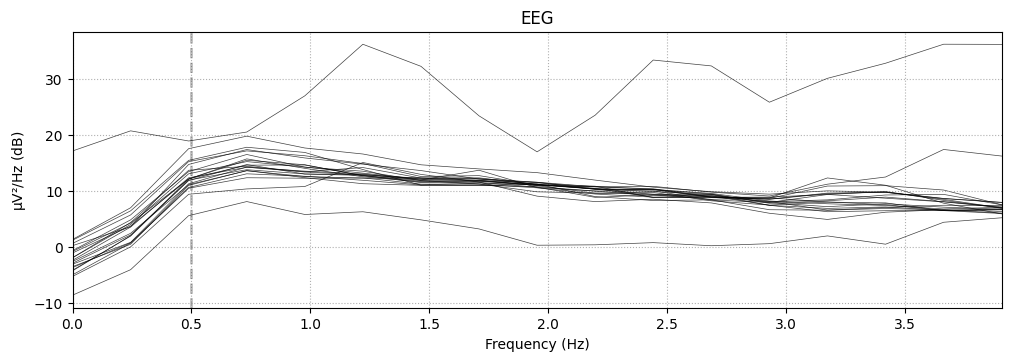

In [32]:
spectrum_before = data0_before.compute_psd(fmin=0, fmax=4)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

##### After Arithmetic Monitoring

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


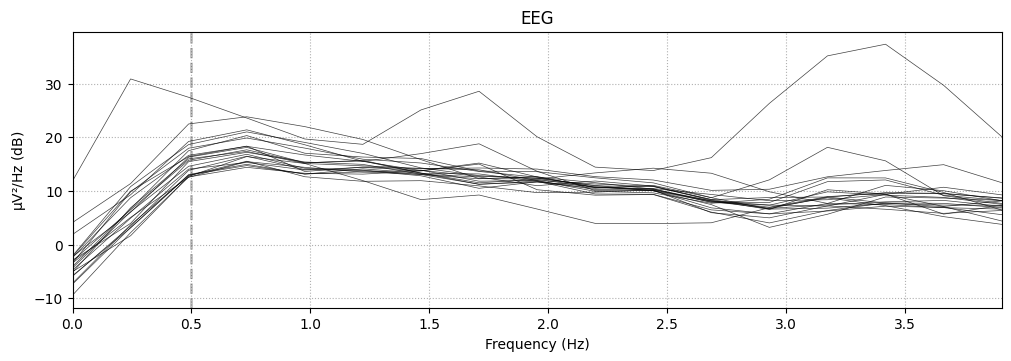

In [33]:
spectrum_after = data0_after.compute_psd(fmin=0, fmax=4)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### Theta - (4 Hz - 8 Hz)

##### Before Arithmetic Monitoring

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


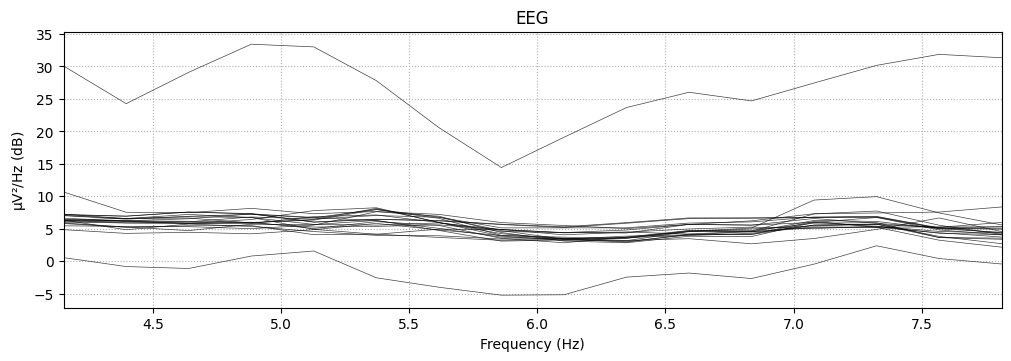

In [34]:
spectrum_before = data0_before.compute_psd(fmin=4, fmax=8)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

##### After Arithmetic Monitoring

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


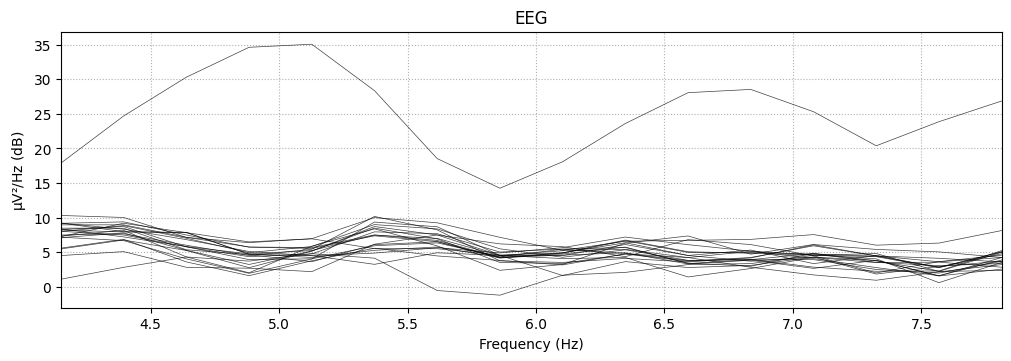

In [35]:
spectrum_after = data0_after.compute_psd(fmin=4, fmax=8)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### Alpha - (8 Hz - 12 Hz)

##### Before Arithmetic Monitoring


Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


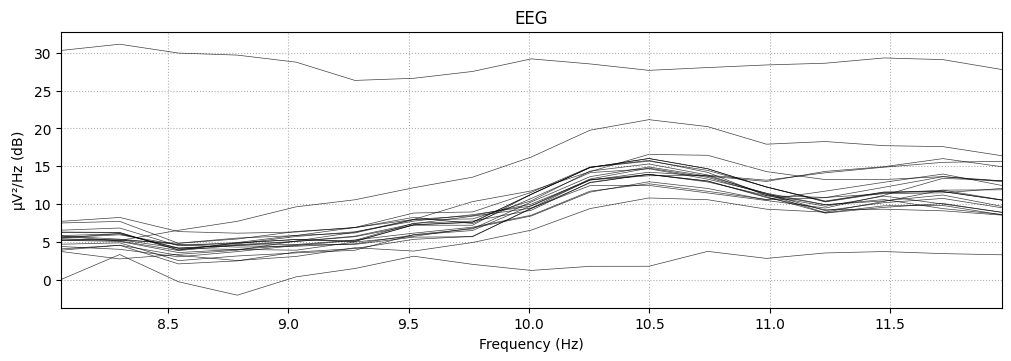

In [37]:
spectrum_before = data0_before.compute_psd(fmin=8, fmax=12)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### After Arithemtic Monitoring 

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


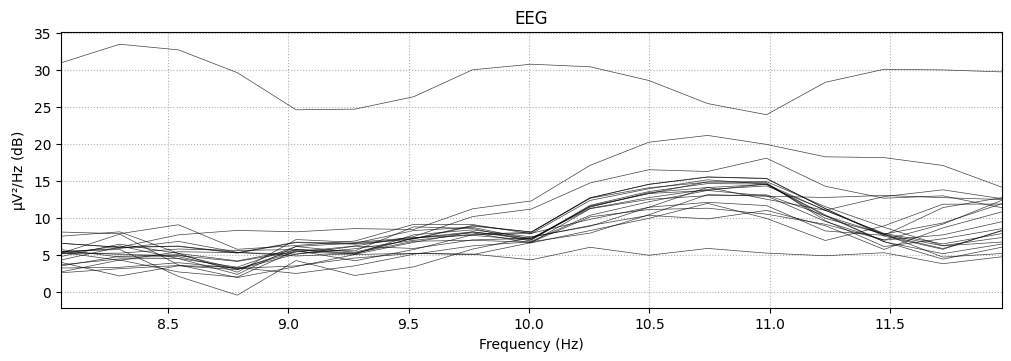

In [38]:
spectrum_after = data0_after.compute_psd(fmin=8, fmax=12)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

### BETA ( 12 - 30 Hz)

#### Before Arithmetic Monitoring 

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


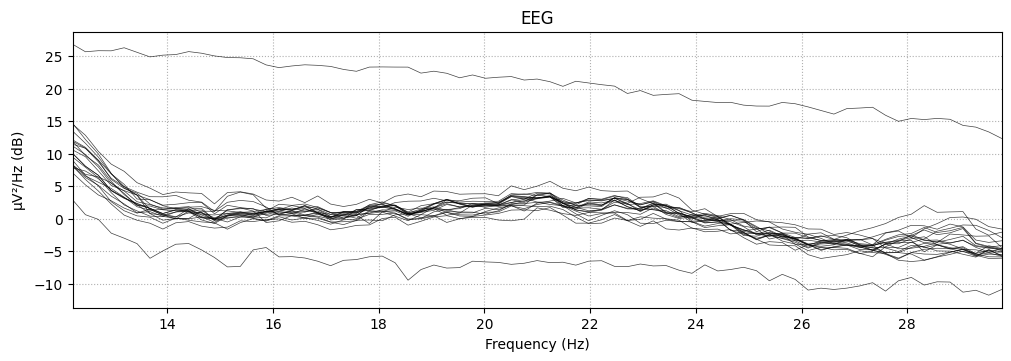

In [39]:
spectrum_before = data0_before.compute_psd(fmin=12, fmax=30)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### After Arithmetic Monitoring 

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


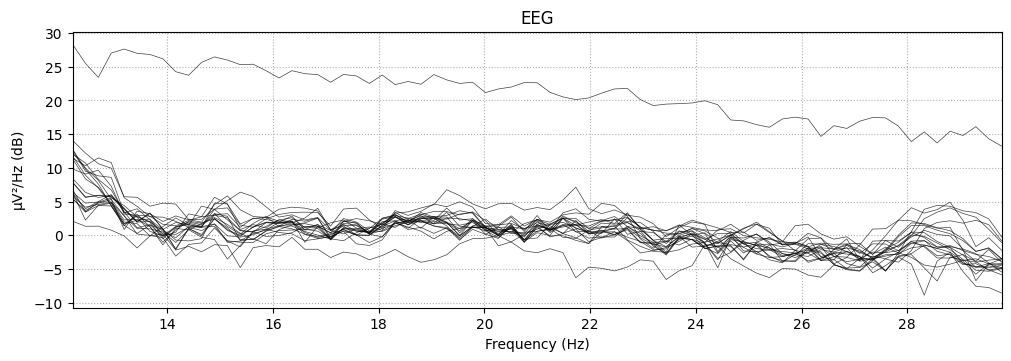

In [40]:
spectrum_after = data0_after.compute_psd(fmin=12, fmax=30)
spectrum_after.plot(average=False, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

### Gamma (30 - 100 Hz)


#### Before arithmetic Monitoring 

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


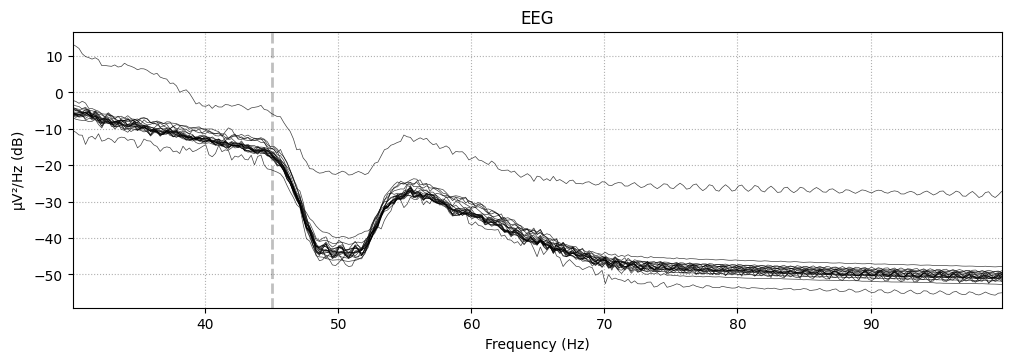

In [41]:
spectrum_before = data0_before.compute_psd(fmin=30, fmax=100)
spectrum_before.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

#### After Arithmetic Monitoring 

Effective window size : 4.096 (s)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


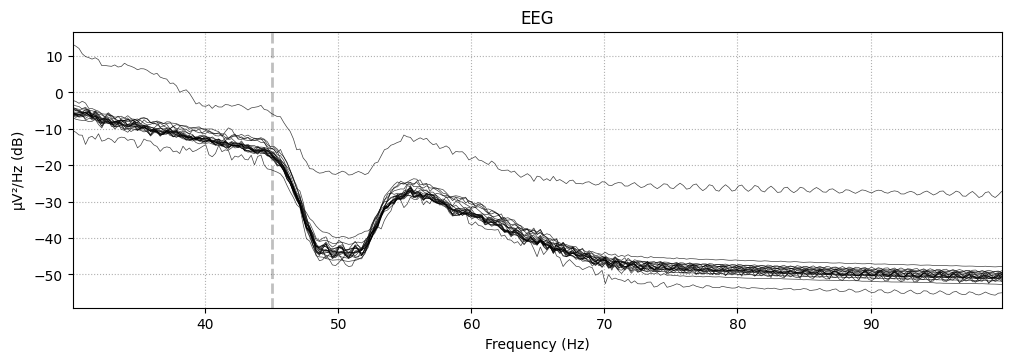

In [42]:
spectrum_after = data0_before.compute_psd(fmin=30, fmax=100)
spectrum_after.plot(average=False, dB=True, amplitude=False, spatial_colors=False, color=mcolors.BASE_COLORS)

## EEGNet Implementation

In [49]:
class EEGNet(nn.Module):
    def __init__(self, F1: int, F2: int, D: int, N: int, C: int, T: int) -> None:
        super(EEGNet, self).__init__()
        # Variables
        self.C = C
        self.T = T

        # Block 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=F1, kernel_size=(1, 64), stride=(1, 1), padding='same')
        self.bn1 = nn.BatchNorm2d(F1)
        self.depthwise_conv = nn.Conv2d(in_channels=F1, out_channels=D*F1, kernel_size=(C, 1), stride=(1, 1), groups=F1)
        self.bn2 = nn.BatchNorm2d(D * F1)
        self.activation1 = nn.ELU()
        self.avg_pool1 = nn.AvgPool2d(kernel_size=(1, 4))
        self.dropout1 = nn.Dropout(p=0.5)  # Choose p=0.25 or p=0.5

        # Block 2
        self.separable_conv = nn.Sequential(
            nn.Conv2d(in_channels=D*F1, out_channels=F2, kernel_size=(1, 16), stride=(1, 1), padding='same', groups=D*F1),
            nn.Conv2d(in_channels=F2, out_channels=F2, kernel_size=1)
        )
        self.bn3 = nn.BatchNorm2d(F2)
        self.activation2 = nn.ELU()
        self.avg_pool2 = nn.AvgPool2d(kernel_size=(1, 8))
        self.dropout2 = nn.Dropout(p=0.5)  # Choose p=0.25 or p=0.5

        # Classifier
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(F2 * (T // 32), N)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Block 1
        # x = torch.reshape(x, (1, self.C, self.T))
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.depthwise_conv(x)
        x = self.bn2(x)
        x = self.activation1(x)
        x = self.avg_pool1(x)
        x = self.dropout1(x)

        # Block 2
        x = self.separable_conv(x)
        x = self.bn3(x)
        x = self.activation2(x)
        x = self.avg_pool2(x)
        x = self.dropout2(x)

        # Classifier
        x = self.flatten(x)
        x = self.dense(x)
        x = self.softmax(x)

        return x

In [50]:
data = data0_before.get_data()
# Convert the EEG data to a PyTorch tensor
eeg_tensor = torch.from_numpy(data[:1000]).float()

# Create an EEGNet model
model = EEGNet(F1=8, F2=16, D=2, N=2, C=data0_before.info['nchan'], T=eeg_tensor.shape[1])

eeg_tensor = torch.reshape(eeg_tensor, (1, 1, eeg_tensor.shape[0], eeg_tensor.shape[1]))
# Input the EEG data to the EEGNet model
model_output = model(eeg_tensor)

# Print the model output
print(model_output)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(input, weight, bias, self.stride,


tensor([[0.5925, 0.4075]], grad_fn=<SoftmaxBackward0>)


In [51]:
data = concatenated_raw_data_list[i].get_data()
print(type(data))

<class 'numpy.ndarray'>


In [52]:
X = concatenated_raw_data_list

In [55]:
Y = pd.read_csv(f"{'Data'}/subject-info.csv")

In [57]:
Y = torch.from_numpy(Y['Count quality'].to_numpy())

In [58]:
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    for i in range(len(X)):
        x = torch.from_numpy(X[i].get_data()).float()
        # print(x.shape)
        x = torch.reshape(x, (1, 1, x.shape[0], x.shape[1]))
        y = Y[i]
        # Forward pass
        output = model(x)
        y_pred = torch.argmax(output, dim=0)
        print(y_pred)
        loss = criterion(y_pred, y)

        # # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print progress
        if i % 100 == 0:
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {loss.item():.4f}')

# # Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for x, y in dataloader:
        y_pred = model(x)
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')



tensor([0, 0])


RuntimeError: "log_softmax_lastdim_kernel_impl" not implemented for 'Long'